# Natural Language Processing

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('mbti_1.csv', error_bad_lines=False)
dataset.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [3]:
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

dataset['words_per_comment'] = dataset['posts'].apply(lambda x: len(x.split())/50)
dataset['variance_of_word_counts'] = dataset['posts'].apply(lambda x: var_row(x))
dataset.head()

,type,posts,words_per_comment,variance_of_word_counts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576


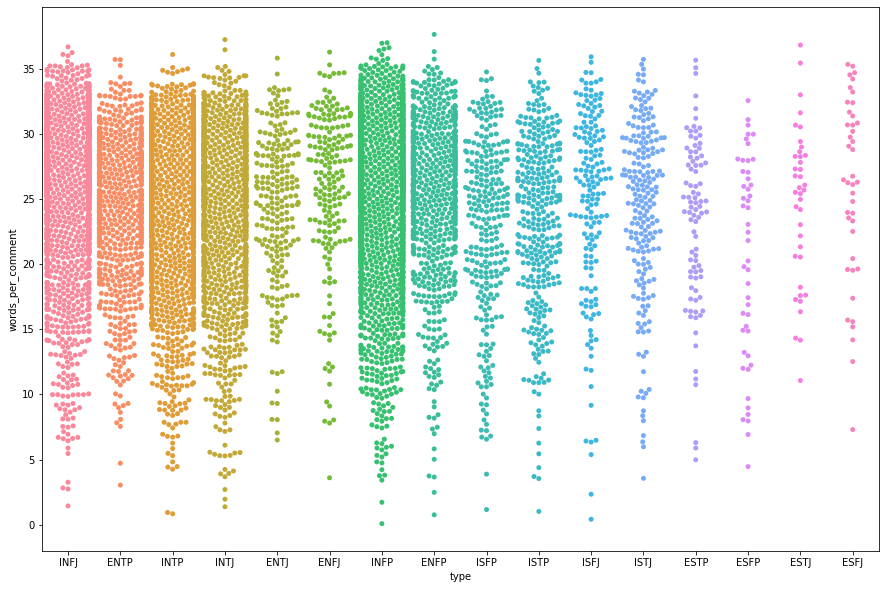

In [4]:
plt.figure(figsize=(15,10))
sns.swarmplot("type", "words_per_comment", data=dataset)

In [5]:
dataset.groupby('type').agg({'type':'count'})

,type
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


In [6]:
print(dataset)

      type                                              posts  \
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1     ENTP  'I'm finding the lack of me in these posts ver...   
2     INTP  'Good one  _____   https://www.youtube.com/wat...   
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4     ENTJ  'You're fired.|||That's another silly misconce...   
...    ...                                                ...   
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...   
8671  ENFP  'So...if this thread already exists someplace ...   
8672  INTP  'So many questions when i do these things.  I ...   
8673  INFP  'I am very conflicted right now when it comes ...   
8674  INFP  'It has been too long since I have been on per...   

      words_per_comment  variance_of_word_counts  
0                 11.12                 135.2900  
1                 23.40                 187.4756  
2                 16.72                 180.6900  
3              

In [7]:
dataset2 = dataset
dataset2['http_per_comment'] = dataset2['posts'].apply(lambda x: x.count('http')/50)
dataset2['qm_per_comment'] = dataset2['posts'].apply(lambda x: x.count('?')/50)
dataset2

,type,posts,words_per_comment,variance_of_word_counts,http_per_comment,qm_per_comment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900,0.48,0.36
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756,0.20,0.10
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900,0.10,0.24
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324,0.04,0.22
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576,0.12,0.20
...,...,...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,15.92,125.3300,0.14,0.18
8671,ENFP,'So...if this thread already exists someplace ...,26.18,125.6144,0.04,0.20
8672,INTP,'So many questions when i do these things. I ...,18.96,169.7764,0.04,0.18
8673,INFP,'I am very conflicted right now when it comes ...,34.10,57.0336,0.00,0.18


In [8]:
print(dataset2.groupby('type').agg({'http_per_comment': 'mean'}))
print(dataset2.groupby('type').agg({'qm_per_comment': 'mean'}))

      http_per_comment
type                  
ENFJ          0.053263
ENFP          0.050459
ENTJ          0.053160
ENTP          0.048263
ESFJ          0.027143
ESFP          0.055417
ESTJ          0.052821
ESTP          0.064719
INFJ          0.065878
INFP          0.075426
INTJ          0.063593
INTP          0.070767
ISFJ          0.070602
ISFP          0.088339
ISTJ          0.061171
ISTP          0.081009
      qm_per_comment
type                
ENFJ        0.213053
ENFP        0.227259
ENTJ        0.240000
ENTP        0.220964
ESFJ        0.176190
ESFP        0.237083
ESTJ        0.209744
ESTP        0.245843
INFJ        0.208966
INFP        0.202533
INTJ        0.214849
INTP        0.221580
ISFJ        0.200964
ISFP        0.216384
ISTJ        0.214927
ISTP        0.221602


<Figure size 1080x720 with 0 Axes>

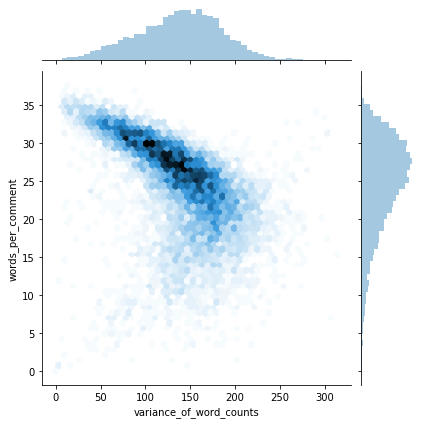

In [9]:
plt.figure(figsize=(15,10))
sns.jointplot("variance_of_word_counts", "words_per_comment", data=dataset, kind='hex')

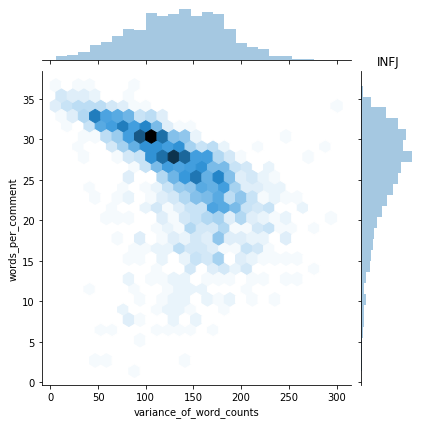

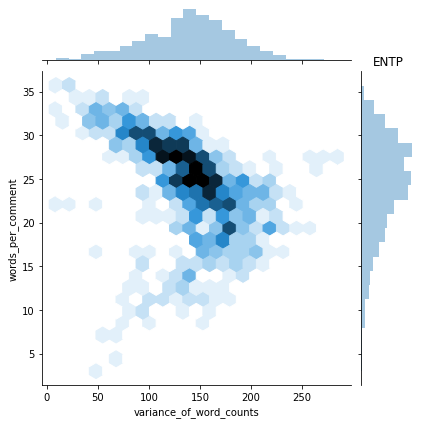

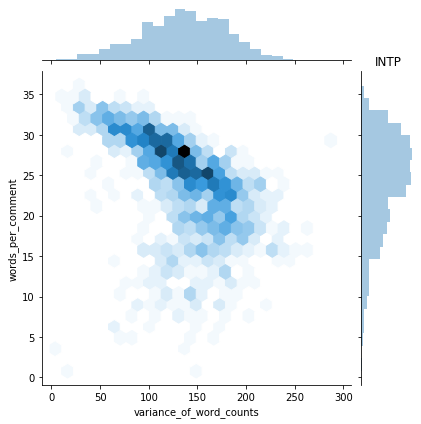

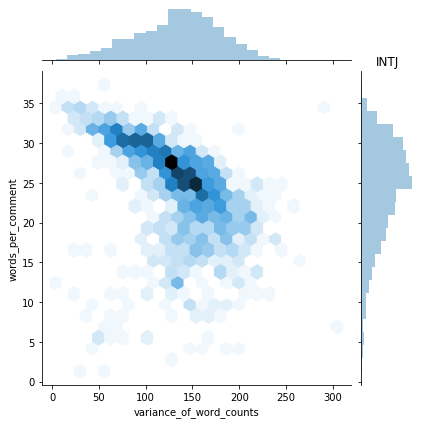

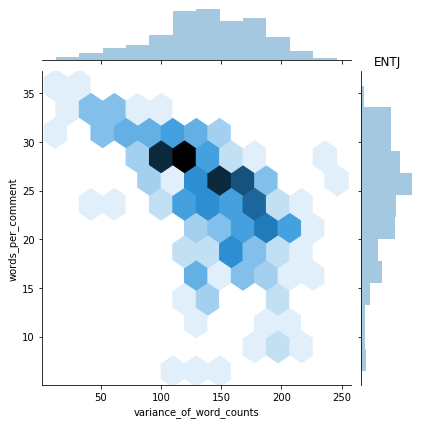

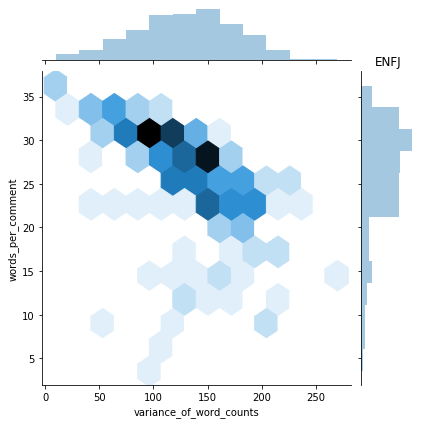

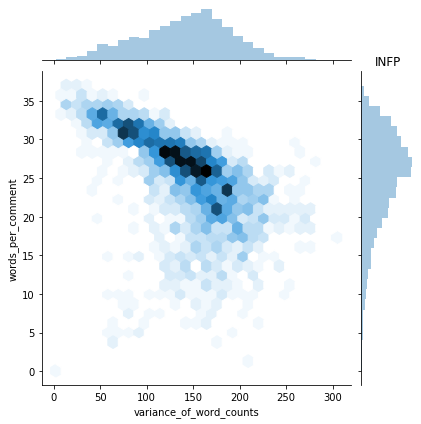

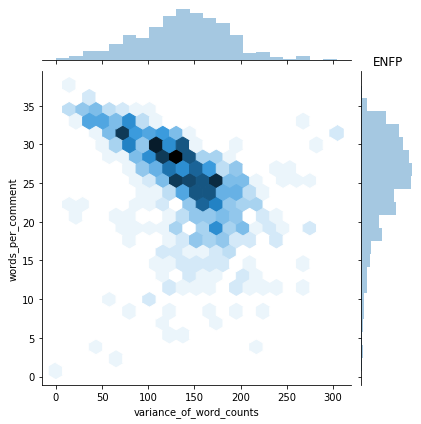

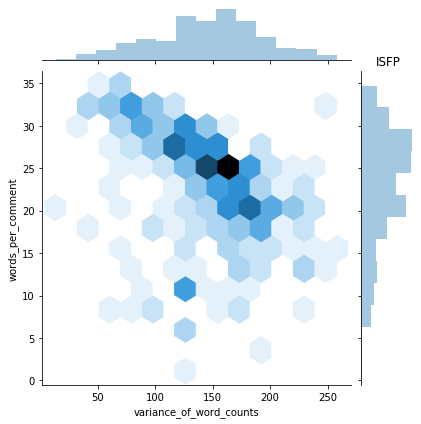

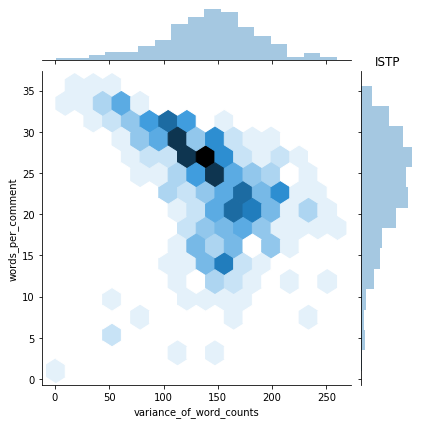

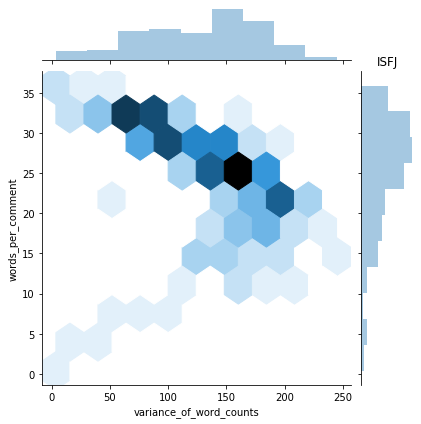

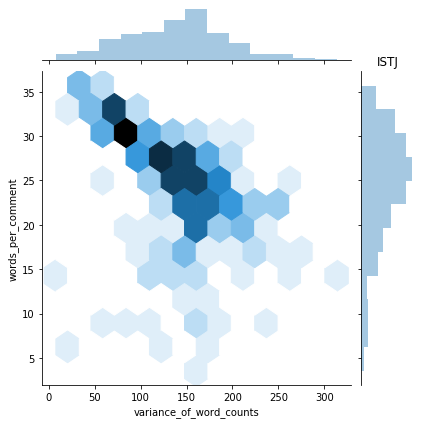

In [10]:
def plot_jointplot(mbti_type, axis, titles):
    dataset3  = dataset2[dataset2['type'] == mbti_type]
    sns.jointplot("variance_of_word_counts", "words_per_comment", data=dataset3, kind='hex', ax=axs, title = titles)
    
i = dataset2['type'].unique()
k = 0
for m in range(0,2):
    for n in range(0,6):
        dataset3 = dataset2[dataset2['type'] == i[k]]
        sns.jointplot("variance_of_word_counts", "words_per_comment", data = dataset3, kind="hex")
        plt.title(i[k])
        k+=1

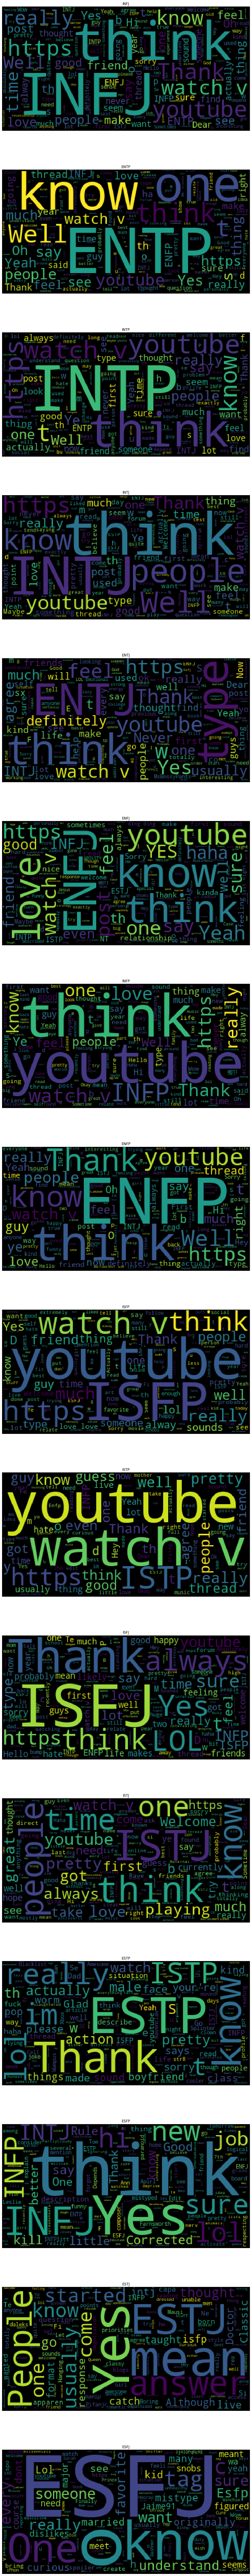

In [15]:
import scipy
#from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS

fig, ax = plt.subplots(len(dataset['type'].unique()), sharex=True, figsize=(15,10*len(dataset['type'].unique())))

k = 0
for i in dataset['type'].unique():
    df_4 = dataset[dataset['type'] == i]
    wordcloud = WordCloud().generate(df_4['posts'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(i)
    ax[k].axis("off")
    k+=1

In [13]:
import sys
print(sys.executable)

C:\Users\admin\Anaconda3\python.exe
